<a href="https://colab.research.google.com/github/neenumohan/Vagbata/blob/main/vagbata_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics, linear_model, naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
import numpy as np
import re

In [2]:
quoted = re.compile("'(.*?)'")

In [3]:
TRAINING_PATH = '/content/drive/MyDrive/vagbata/train'
TEST_PATH = '/content/drive/MyDrive/vagbata/test'

In [4]:
training_files = []
test_files = []
ytrain = []
ytest = []

In [6]:
def tokenize_terms(text):
    tokens = re.split('\s',text)
    
    final_tokens = []
    for token in tokens:
      if token != ' ' and token != '' and token != '।' and token != '॥':
        if token not in final_tokens:
          final_tokens.append(token)

    return final_tokens        

def findAuthorFromFileName(file_name):
  if "AH" in file_name:
        return 1
  elif "AS" in file_name:
        return 2
  else:
        return -1

In [7]:
t = tokenize_terms("१२.७०bv कलयंस् तु भिषग्-ब्रुवः १२.७०bv कल्पयंस् तु भिषग् ध्रुवम् ततो ऽल्पम् अल्प-वीर्यं वा गुरु-व्याधौ प्रयोजितम् ।\nउदीरयेत्-तरां रोगान् संशोधनम् अ-योगतः ॥ ७१ ॥\nशोधनं त्व् अति-योगेन विपरीतं विपर्यये ।\nक्षिणुयान् न मलान् एव केवलं वपुर् अस्यति ॥ ७२ ॥")
print(t)

['१२.७०bv', 'कलयंस्', 'तु', 'भिषग्-ब्रुवः', 'कल्पयंस्', 'भिषग्', 'ध्रुवम्', 'ततो', 'ऽल्पम्', 'अल्प-वीर्यं', 'वा', 'गुरु-व्याधौ', 'प्रयोजितम्', 'उदीरयेत्-तरां', 'रोगान्', 'संशोधनम्', 'अ-योगतः', '७१', 'शोधनं', 'त्व्', 'अति-योगेन', 'विपरीतं', 'विपर्यये', 'क्षिणुयान्', 'न', 'मलान्', 'एव', 'केवलं', 'वपुर्', 'अस्यति', '७२']


In [8]:
def train_and_test_model(classifier, Xtrain, ytrain, Xtest, ytest, is_neural_net=False):
    classifier.fit(Xtrain, ytrain)

    pred = classifier.predict(Xtrain)
    score = metrics.accuracy_score(ytrain, pred)

    if is_neural_net:
        pred = pred.argmax(axis = -1)

    print ('Accuracy on training set = ', score*100)

    pred = classifier.predict(Xtest)
    score = metrics.accuracy_score(ytest, pred)

    if is_neural_net:
        print(confusion_matrix(ytest, pred))
        print(classification_report(ytest,pred))
        pred = pred.argmax(axis = -1)
    
    print (pred)
    print ('Accuracy on test set = ', score*100)
    return score*100

In [9]:
def create_model_architecture(input_size, number_of_hidden_units, output_size):
    input_layer = layers.Input((input_size, ), sparse=True)

    hidden_layer = layers.Dense(number_of_hidden_units, activation="sigmoid")(input_layer)

    output_layer = layers.Dense(output_size, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)

    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')

    return classifier

In [11]:
all_files = os.listdir(TRAINING_PATH)    
for file_path in all_files:
    f = open(os.path.join(TRAINING_PATH,file_path), 'rb').read().decode('utf-8')
    training_files.append(f)
    ytrain.append(findAuthorFromFileName(file_path))

In [12]:
for y in ytrain:
    if y==-1:
        print('Bad data.')

In [13]:
all_files = os.listdir(TEST_PATH)
for file_path in all_files:
    f = open(os.path.join(TEST_PATH,file_path), 'rb').read().decode('utf-8')
    test_files.append(f)
    ytest.append(findAuthorFromFileName(file_path))

In [14]:
for y in ytest:
  print(y)
  if y==-1:
    print('Bad data.')
print(len(test_files))
print(ytest)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
47
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [15]:
maxf = 100
plotx = []
ploty = []
plotT = []
plotTy = []

while maxf<= 2000:
    plotx.append(maxf)
    best_score = 0
    vectorizer = TfidfVectorizer(tokenizer=tokenize_terms, ngram_range=(1,2),max_features=maxf)
    print ('Unigram and bigram features included...')

    maxf = maxf + 100
    Xtrain = vectorizer.fit_transform(training_files)
    Xtest = vectorizer.transform(test_files)
    features = vectorizer.get_feature_names()
    print ('Number of features extracted =',len(features))
    hidden_layers = 10
    print ('='*80)
    print ('Training neural network...')
    while hidden_layers <=100:
        nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(hidden_layers,))
        #nn = create_model_architecture(input_size, hidden_layers, 2)
        print ('Number of hidden layers = ', hidden_layers)
        score = train_and_test_model(nn, Xtrain, ytrain, Xtest, ytest, True)
        hidden_layers = hidden_layers + 20

        if score> best_score:
            best_score = score

    ploty.append(best_score)


Unigram and bigram features included...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 100
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 200
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 300
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  50
Accuracy o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 400
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  50
Accuracy o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 500
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 600
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 700
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 800
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 900
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1000
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1100
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 2 22]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       1.00      0.92      0.96        24

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47

23
Accuracy on test set =  95.74468085106383
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1200
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1300
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1400
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1500
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1600
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1700
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1800
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 1 23]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        24

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

23
Accuracy on test set =  97.87234042553192
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 1900
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features extracted = 2000
Training neural network...
Number of hidden layers =  10
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  30
Accuracy on training set =  100.0
[[23  0]
 [ 0 24]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

23
Accuracy on test set =  100.0
Number of hidden layers =  50
Accuracy on training 

In [16]:
print (ytest)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [17]:
import pandas as pd
df = pd.DataFrame(Xtrain[0].T.todense(), index=vectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                TF-IDF
नीत्वा        0.160218
यत्नेन        0.160218
मार्गान्      0.160218
सामो          0.160218
मद्यैः        0.160218
शमाय          0.160218
तेभ्यो        0.160218
दीप्ते ऽग्नौ  0.160218
मधुकेन        0.154501
ऊष्मा         0.154501
सति           0.154501
पाचनं         0.154501
दोषेण         0.149549
ऽन्नं         0.149549
मले           0.149549
वमने          0.149549
चले           0.145181
दीप्ते        0.145181
ग्रीष्मे      0.145181
पित्ताद्      0.145181
कृते          0.141274
स्वास्थ्यं    0.141274
तोयं          0.137739
अन्य-था       0.134512
सामे          0.134512


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


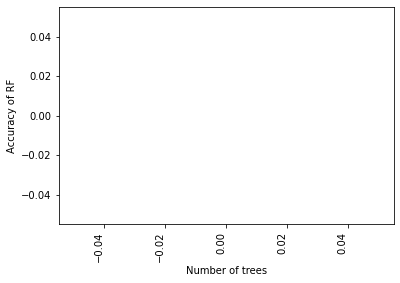

In [21]:
plt.plot(plotT, plotTy)
plt.xticks(rotation='vertical', ha='right')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy of RF')
plt.show()

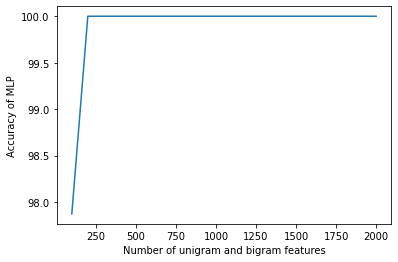

In [19]:
plt.plot(plotx,ploty)
plt.xlabel('Number of unigram and bigram features')
plt.ylabel('Accuracy of MLP')
plt.show()

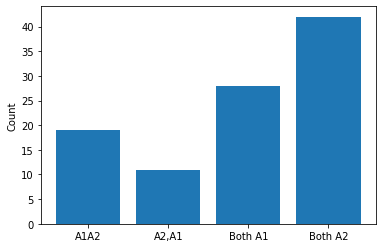

(array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([11. , 14.1, 17.2, 20.3, 23.4, 26.5, 29.6, 32.7, 35.8, 38.9, 42. ]),
 <a list of 10 Patch objects>)

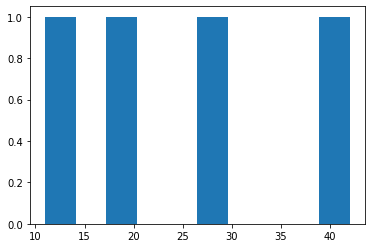

In [20]:
x=['A1A2', 'A2,A1', 'Both A1', 'Both A2']
y=[19,11,28,42]
plt.bar(x,y)
plt.ylabel('Count')
plt.show()
plt.hist(y)